Import Necessary Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [9]:
# Load your dataset
df = pd.read_csv('../data/boston_housing.csv')

# Handling outliers
upper_limit = df['price'].quantile(0.99)
df['price'] = np.where(df['price'] > upper_limit, upper_limit, df['price'])

# Encoding categorical variables
binary_vars = ['mainroad', 'guestroom', 'basement', 
               'hotwaterheating', 'airconditioning', 'prefarea']

for var in binary_vars:
    df[var] = df[var].map({'yes':1, 'no':0})

df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Feature scaling
X = df.drop('price', axis=1)
y = df['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Splitting data into train/test clearly
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)

Ensure Data and Model are Ready

In [10]:
# Train your Linear Regression model again
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
print(X_test.head())
print(y_test.head())
print(model)

         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
316  0.345668  1.403419   1.421812  0.224410 -2.465344  -0.465315  1.361397   
77   0.622401  0.047278   1.421812  1.378217  0.405623  -0.465315 -0.734539   
360 -0.512207 -1.308863  -0.570187 -0.929397  0.405623  -0.465315 -0.734539   
90  -0.069433  0.047278  -0.570187  0.224410  0.405623  -0.465315 -0.734539   
493 -0.549105  0.047278  -0.570187 -0.929397  0.405623  -0.465315 -0.734539   

     hotwaterheating  airconditioning   parking  prefarea  \
316        -0.219265        -0.679063  0.355976 -0.554035   
77         -0.219265         1.472618 -0.805741  1.804941   
360        -0.219265        -0.679063 -0.805741 -0.554035   
90         -0.219265         1.472618 -0.805741 -0.554035   
493        -0.219265        -0.679063 -0.805741 -0.554035   

     furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
316                        -0.844888                      1.435896  
77                  

Make Predictions on Test Data (if not already done)

In [12]:
y_pred = model.predict(X_test)

Evaluate and Print Metrics Clearly

In [13]:
# Evaluate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Evaluate R-squared (Coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Display clearly
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1438506758866.77
R-squared: 0.68


Plot Actual vs. Predicted Prices

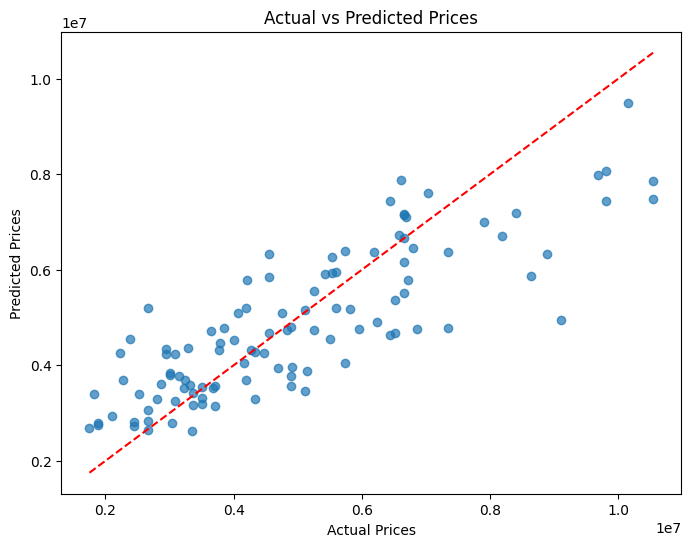

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.show()


Residual Analysis

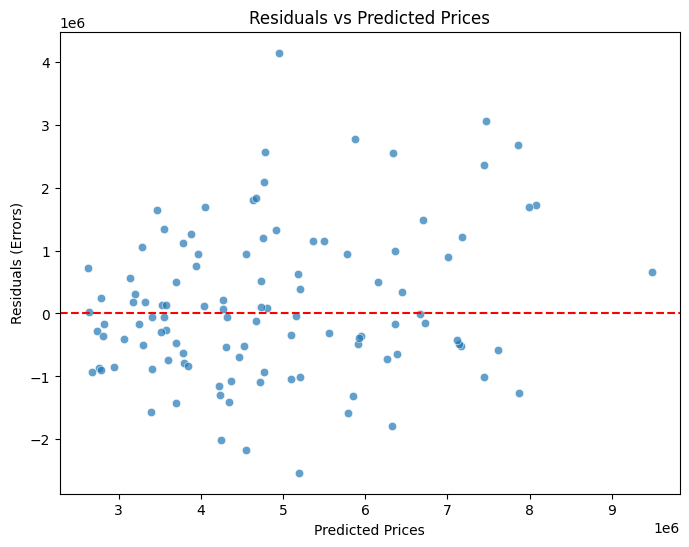

In [15]:
# Calculate residuals (differences between actual and predicted values)
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Errors)')
plt.title('Residuals vs Predicted Prices')
plt.axhline(y=0, color='red', linestyle='--')  # reference line at residual=0
plt.show()


Distribution of Residuals

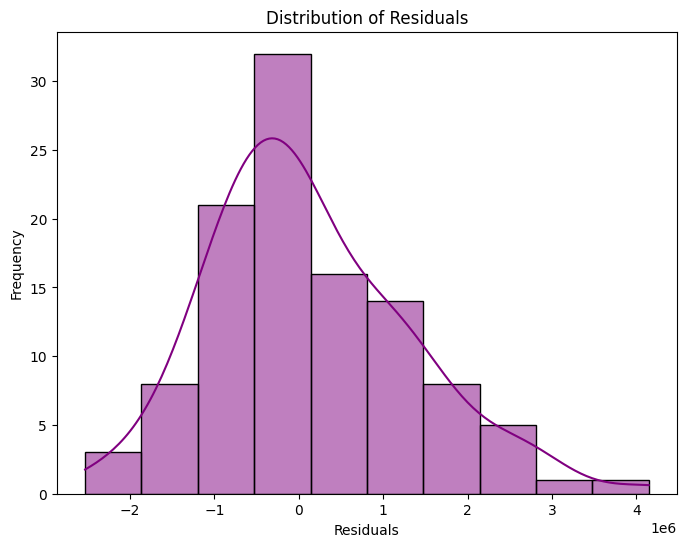

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
